# Talk 🤷🏻 to your PDF file 📄
* ### Unleash the Power of Your PDF: Have a Conversation with Your Digital Documents

Recent advances in language models like ChatGPT and GPT-4 have transformed human-tech interaction. Nomic AI's open-source GPT4all empowers developers to tailor and deploy locally, offering customization and flexibility beyond its counterparts. In this evolving landscape, GPT4all stands as a beacon of collaboration and innovation, enhancing the dynamic interplay between humans and technology.

In [ ]:
!pip install langchain

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.7.1 which is incompatible.



  Obtaining dependency information for langchain from https://files.pythonhosted.org/packages/7a/d0/e99c1f0ba271b8269edd30a9362592ef3aa3499b448924e16f4dd00e58f8/langchain-0.0.267-py3-none-any.whl.metadata
  Obtaining dependency information for dataclasses-json<0.6.0,>=0.5.7 from https://files.pythonhosted.org/packages/97/5f/e7cc90f36152810cab08b6c9c1125e8bcb9d76f8b3018d101b5f877b386c/dataclasses_json-0.5.14-py3-none-any.whl.metadata
  Obtaining dependency information for langsmith<0.1.0,>=0.0.21 from https://files.pythonhosted.org/packages/3a/51/63ff9bfcb70146b2ff72858765fc32427d127e4e50bb5bd946f78121560d/langsmith-0.0.24-py3-none-any.whl.metadata
  Using cached openapi_schema_pydantic-1.2.4-py3-none-any.whl (90 kB)
  Obtaining dependency information for pydantic<3,>=1 from https://files.pythonhosted.org/packages/82/54/ed9a1005c580b619a4c53c324f472c99c165051b22f8885b09be1882aece/pydantic-2.2.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/145.6 kB ? eta -

In [ ]:
from langchain.document_loaders import PyPDFLoader
from langchain.chains import load_chain
from langchain.vectorstores import FAISS
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.llms import OpenAI
from langchain.chains.question_answering import load_qa_chain
import os

In [ ]:
from gpt4all import GPT4All, Embed4All

In [ ]:
model = GPT4All("nous-hermes-13b.ggmlv3.q4_0.bin")

Found model file at  C:\\\\Users\\\\I564583\\\\.cache\\\\gpt4all\\nous-hermes-13b.ggmlv3.q4_0.bin


In [ ]:
!pip install pypdf

  Obtaining dependency information for pypdf from https://files.pythonhosted.org/packages/06/f7/0a462dc4113271bfac2759e7c5ca57b1409a6c6f30013aa87fba8a725066/pypdf-3.15.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/271.0 kB ? eta -:--:--
   ------------ --------------------------- 81.9/271.0 kB 2.3 MB/s eta 0:00:01
   ------------------------------ --------- 204.8/271.0 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 271.0/271.0 kB 2.8 MB/s eta 0:00:00


## Load the file using Langchain libraries
Once you have the provided .pdf file, you need to load it into your Python environment using Langchain libraries. This will allow you to access the text data and perform operations such as text embedding.

To load the file, you can use the PyPDFLoader function provided by LangChain. Here's an example code snippet:

In [ ]:
loader = PyPDFLoader("Talk2AI.pdf")
pages = loader.load_and_split()

In [ ]:
pages[100]

Document(page_content='4.Complete the fields  in the Edit Resource Group  dialog box.\na.Change the subaccount_id  value, if required.\nb.Change the zone_id  value, if required.\nc.Change the instance_id  value, if required.\nd.If additional label changes are required, then change the label key or corresponding value.\n5.Choose Edit  to save the changes to the resource group.\n6.Optional: Y ou can also make changes to associated object store secrets. T o do so, view the resource group \ndetails. Choose Add , Edit , or Remove  to change an object store secret for the resource group. See Edit an \nObject Store Secret [page 109] and Remove an Object Store Secret [page 110].\nResults\nThe resource group is changed. The updated resource group appears on the All Resource Groups  screen.SAP AI Launchpad\nUsing SAP AI Launchpad INTERNAL 101', metadata={'source': 'AILaunchpad.pdf', 'page': 100})

In [ ]:
len(pages)

272

In [ ]:
query = "What is executable and their placeholders?"
# query = "What is Launchpad?"

## Embedding
To use text embeddings in your Python code, you can follow these steps:

- Install the Langchain libraries if you haven't already.
- Using FAISS

In [ ]:
from langchain.vectorstores import FAISS
from langchain.embeddings.gpt4all import GPT4AllEmbeddings

# create a FAISS index

query = "What is executable and their placeholders?"  
faiss_index = FAISS.from_documents(pages, GPT4AllEmbeddings())

#get similar result from embeddings
# your query embedding
docs = faiss_index.similarity_search(query, k=1)

## Create GPT4ALL Model
The langchain.llms module is a part of the LangChain platform and provides access to GPT4ALL's language models. To create a model, here's an example code snippet:

You can refer to the source for more information. GPT4ALL

The langchain.chains.question_answering module is probably a part of the LangChain platform and provides functionality for implementing question answering chains. To load a pre-trained question answering model, you can use the load_qa_chain function within the module. Here's an example code snippet:

In [ ]:
from langchain.llms import GPT4All
from langchain.chains import load_chain
from langchain.chains.question_answering import load_qa_chain

In [ ]:
def greet(query,temperature):
    llm = GPT4All(model = "orca-mini-3b.ggmlv3.q4_0.bin")
    chain = load_qa_chain(llm, chain_type="stuff")
    answer = chain.run(input_documents=docs, question=query)
    return answer

## Creating an Interactive Dashboard
Once Gradio is installed, you can create an interactive dashboard for your machine learning model using the Gradio interface. You can start by creating a function that takes input from the user and returns the output of your model. For example, let's say you have a function called 'greet' that takes query and returns the predicted result to that query. Here's how you can create an interactive dashboard for this function using Gradio:

```import gradio as gr```

In [ ]:
demo = gr.Interface(fn=greet,
                    inputs=[gr.Textbox(lines=2, placeholder="Talk to your document..."),gr.Slider(0.0, 1.0)],
                    outputs=[gr.Textbox(label="Answer:")]
                   )

In [18]:
# deploy the interface

demo.launch() 

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


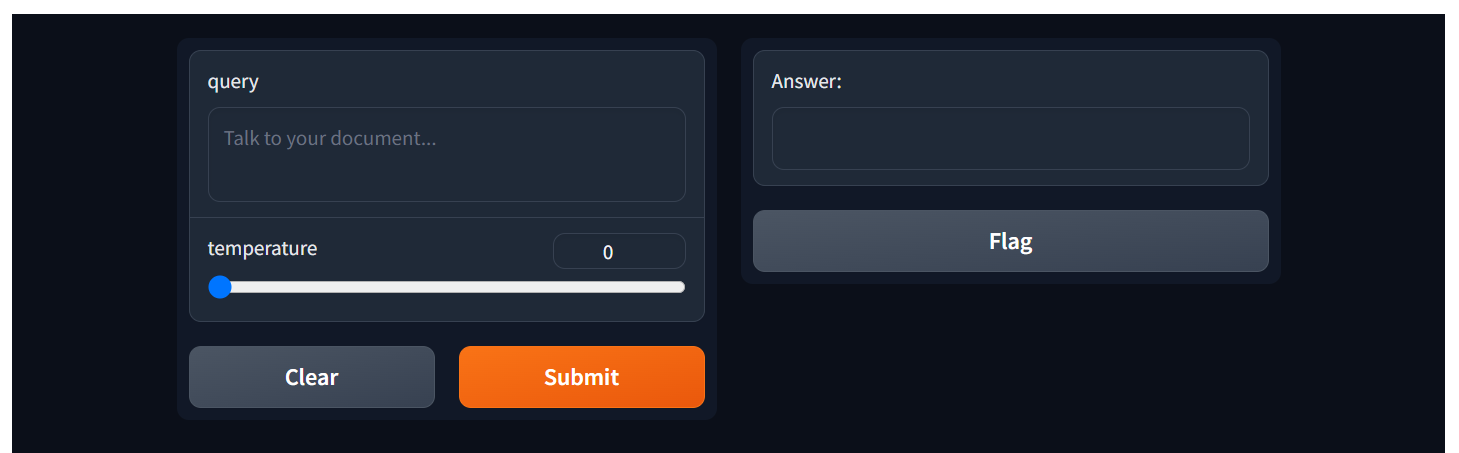